 **Your Feedback and suggestion would be helpful for my learning**

Dataset -- **Adult Income**


About the dataset --
    The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

further more you can read about it --
download the dataset  --
    https://archive.ics.uci.edu/dataset/2/adult

It consider to be a good practice to get knowledge about dataset as much as possible, it going to help in building our model.
Task - Perform defferent steps of EDA on choosen dataset.

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/kaggle/input/adult-census-income/adult.csv') # Loading the dataset

In [3]:
df.shape # printing shape to get idea about no. of rows and columns, even though i have some background knowledge about dataset.

(32561, 15)

So we total have 48842 rows and 15 features




Attribute Information:

**age:** continuous.

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num:** continuous.

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex:** Female, Male.

**capital-gain:** continuous.

**capital-loss:** continuous.

**hours-per-week:** continuous.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. class: >50K, <=50K

**Notes for Delve**
One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.

Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.

The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [4]:
df.info() # it tell us about data type and if null value present of each column(feature)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


So from df.info() we get to know about features with their data type and if any null value presents in it. so we don't have any null value in this dataset.

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


So we don't have null value instead we have '?' in two columns that is workclass and occupation contains '?' so need to handle it

In [6]:
df.replace('?', np.nan, inplace = True) # Here we replace '?' with nan
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Now we can see that in index 4 instead of '?' it has replaced with nan value
Next check how many values is nan.

In [7]:
df.isnull().sum() # count of no. of null values present in each columns.

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

surprise !!!  initially when we did df.head we seen that only two columns contains "?" but now we can say that original dataset have three columns contain '?'.

Okay, so we have our results. There are three columns with some missing values:

workclass = 1836 missing

occupation = 1843 missing

native.country = 583 missing

Hmm, the count of missing values in workclass and occupation column seem to be pretty close. That can’t be a coincidence, can it? Let’s put our detective hats on again:

In [8]:
len(df.loc[ (df['occupation'].isnull()) & ((df['workclass'].isnull()))])

1836

Since the intersection of data points with missing occupation and missing workclass is the same as the number of data points with missing workclass, we know that where ever occupation is missing, workclass is too.

Now i need to handle missing value
we have several options for handling them:

Imputation: we can fill in missing values with appropriate data. Common methods include filling missing values with the mean, median, mode, or specific values.

Dropping Rows: If the number of rows with missing values is relatively small, we can choose to drop those rows using the dropna() method. But this approach, can lead to data loss

Dropping Columns: In some cases, we might need to drop entire columns with a high percentage of missing values using the drop() method.

There are many more methods i have mentioned some of them.

Since in our case we have less missing value campare to total no. of row and again for making things simple for now, we can choose dropping rows

In [9]:
df.dropna(inplace = True)
# Now we tackled with missing data
# check for duplicates
df.drop_duplicates(inplace=True)

**In statistics**
we have two type of data
1.  Qualitative

    a.  Nominal data    (not ordered(hair color, Gender, etc))

    b.  ordinal data    (Grade (A to F) or Health(good, normal, bad), etc.
2.  Quantitative

    a.  Discreate   (The no. of student in a class)
    
    b.  Continuous  ( Height of students in a class)

Based on this we can divide our given dataset columns.
1.  Age: Discrete (from 17 to 90)
2.  Work class (Private, Federal-Government, etc): Nominal (9 categories)
3.  Final Weight (the number of people the census believes the entry represents): Discrete
4.  Education (the highest level of education obtained): Ordinal (16 categories)
5.  Education Number (the number of years of education): Discrete (from 1 to 16)
6.  Marital Status: Nominal (7 categories)
7.  Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)
8.  Relationship in family (unmarried, not in the family, etc): Nominal (6 categories)
9.  Race: Nominal (5 categories)
10. Gender: Nominal (2 categories)
11. Capital Gain: Continous
12. Capital Loss: Continous
13. Hours (worked) per week: Discrete (from 1 to 99)
14. Native Country: Nominal (42 countries)
15. Income (whether or not an individual makes more than $50,000 annually): Boolean (≤$50k, >$50k)




**Data Visualization**

In [10]:
df.describe() # It gives the descriptive statistics about numerical columns.

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Univariate Analysist**

**Income Distribution**


income
<=50K    22633
>50K      7506
Name: count, dtype: int64


<Axes: ylabel='count'>

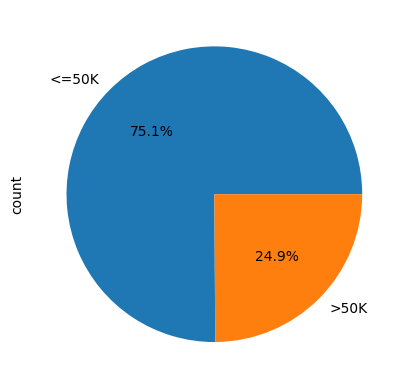

In [11]:

print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct= '%1.1f%%')

we can clearly see that adults with income less than 50000 are almost 3 times greater than adults with income greater than 50000.

**Age Distribution**

Text(0, 0.5, 'count')

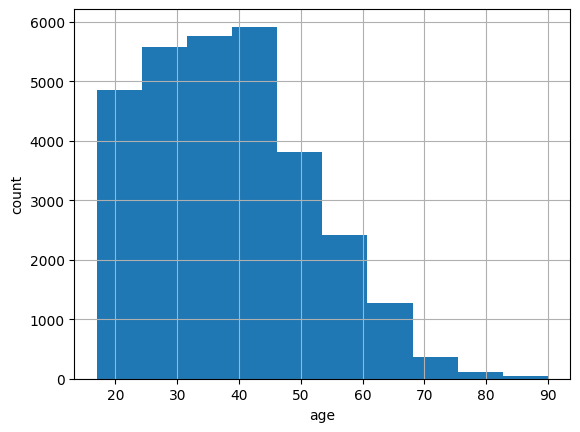

In [12]:
df['age'].hist()
plt.xlabel('age')
plt.ylabel('count')

By observation age attribute is right-skewed and not symetric. min and max age in btw 17 to 90.

**Final Weight Distribution**

Text(0, 0.5, 'count')

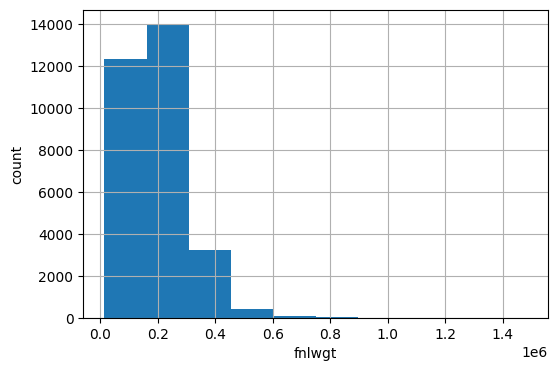

In [13]:
df['fnlwgt'].hist(figsize=(6,4))
plt.xlabel('fnlwgt')
plt.ylabel('count')

I also seems like Rightly skewed.

**Capital-gain Distribution**

Text(0, 0.5, 'count')

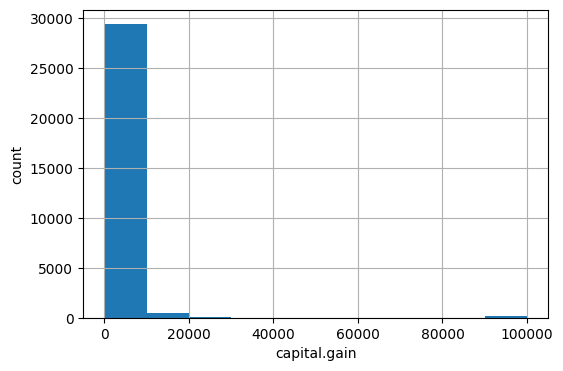

In [14]:
df['capital.gain'].hist(figsize=(6,4))
plt.xlabel('capital.gain')
plt.ylabel('count')

capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k). Also from df.describe() we can see that most of value are zero, so we can even remove this, we can have two approach that with or without this features can then can take the better one, but here again for simplicity we will remove this column, this column does not making significant role in result, since most of the values is zero.

**Capital-loss Distribution**

Text(0, 0.5, 'count')

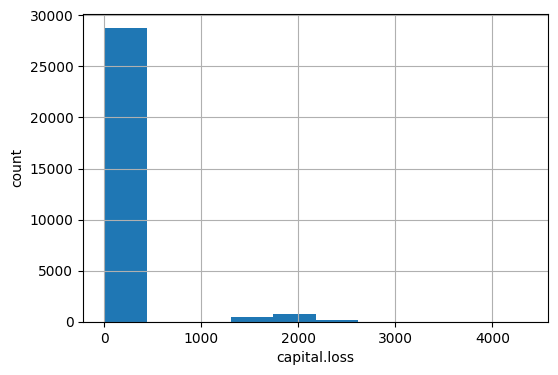

In [15]:
df['capital.loss'].hist(figsize=(6,4))
plt.xlabel('capital.loss')
plt.ylabel('count')

It is also similar to captain-gain we can also remove this feature too. as most of the rows have value zero.

**hours-per-week Distribution**

Text(0, 0.5, 'count')

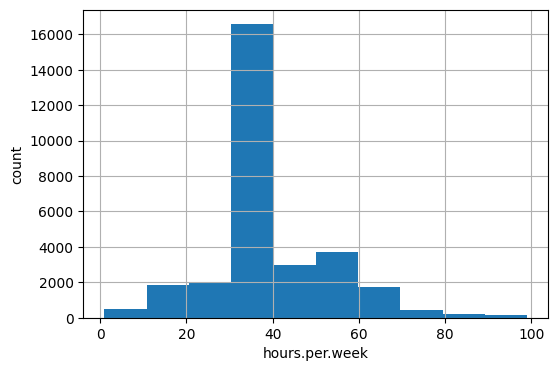

In [16]:
df['hours.per.week'].hist(figsize=(6,4))
plt.xlabel('hours.per.week')
plt.ylabel('count')

So from graph we can see that hours per week is seems like slightly normally distrubuted with max count for work hourk between 30-40 with count around 18000
There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

**Workclass Distribution**

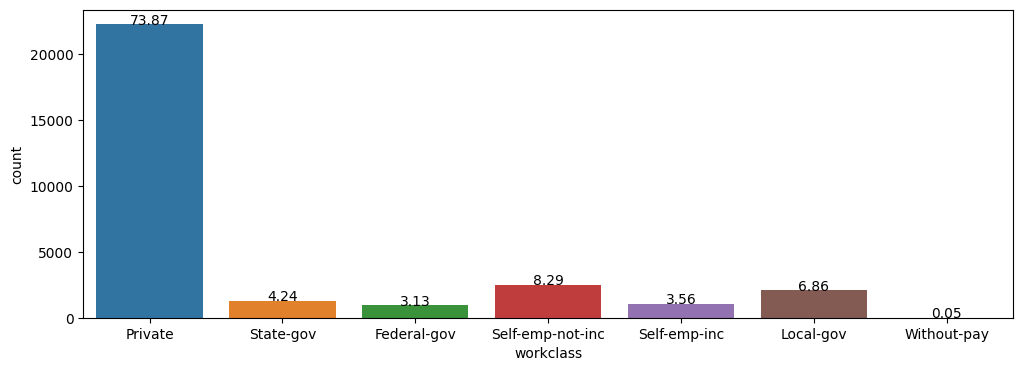

In [17]:
plt.figure(figsize=(12,4))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")

Most of them are form private workclass with around 74% and rest all have less contribution compare to private with without-pay as least count of around 0.05% of total count.

**Education Distribution**

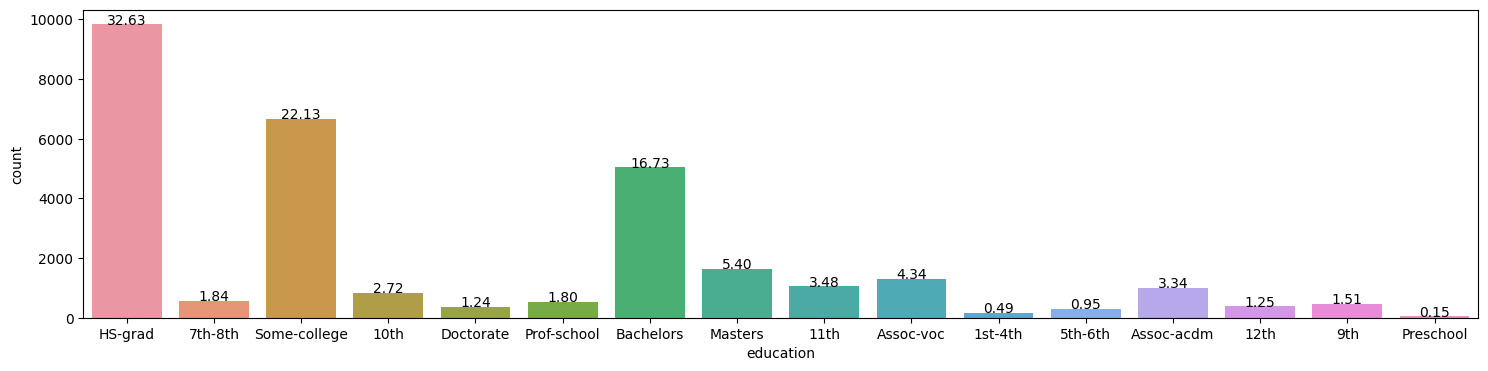

In [18]:
plt.figure(figsize=(18,4))

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

HS-grad has highest no of adults and preschool have lowest.

**marital-status Distribution:**

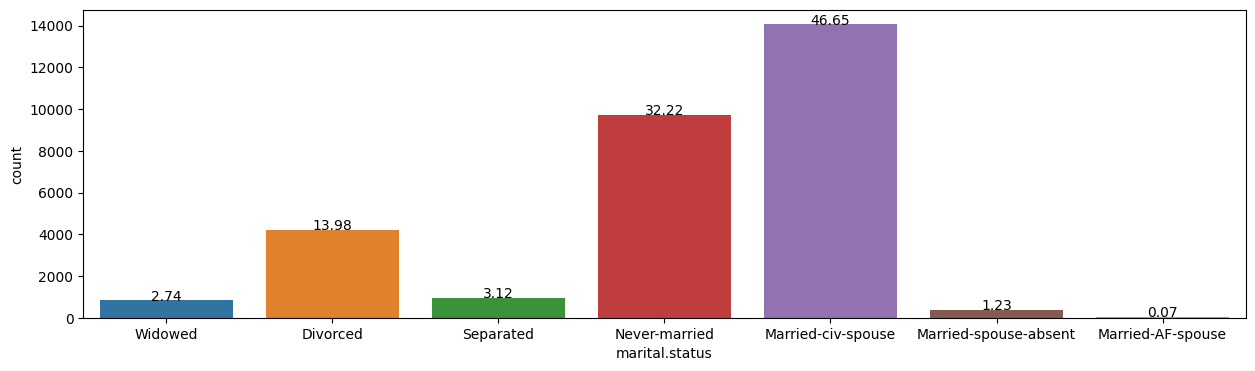

In [19]:
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="marital.status", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

Married-civ-spouse has maximum number of samples. Married-AF-spouse has minimum number of obs.

**Occupation Distribution:**

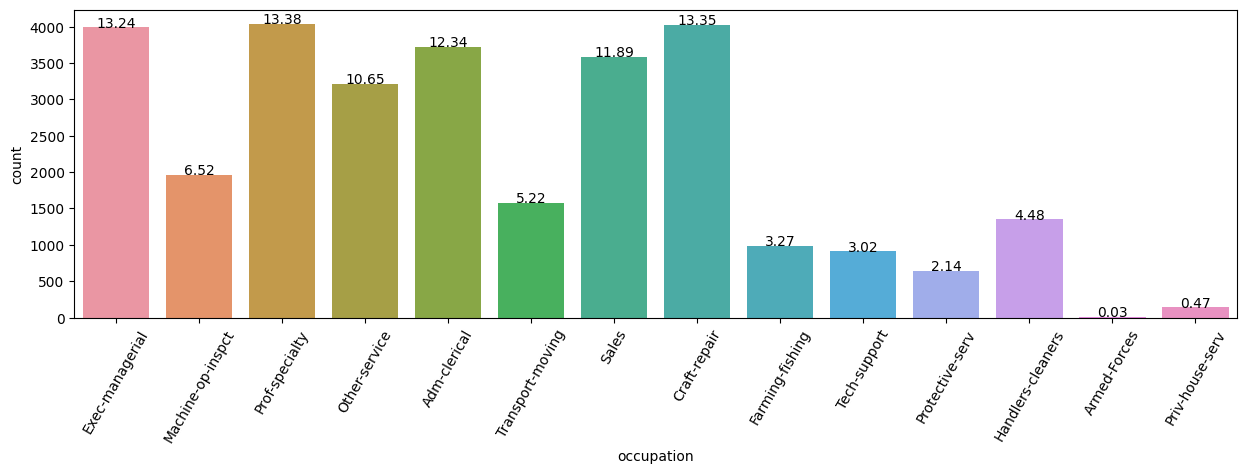

In [20]:
plt.figure(figsize=(15,4))
total = float(len(df) )
a = sns.countplot(x="occupation", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

craft-repair has the maximum count. Armed-Forces has minimum samples in the occupation attribute.

**Relationship Distribution**

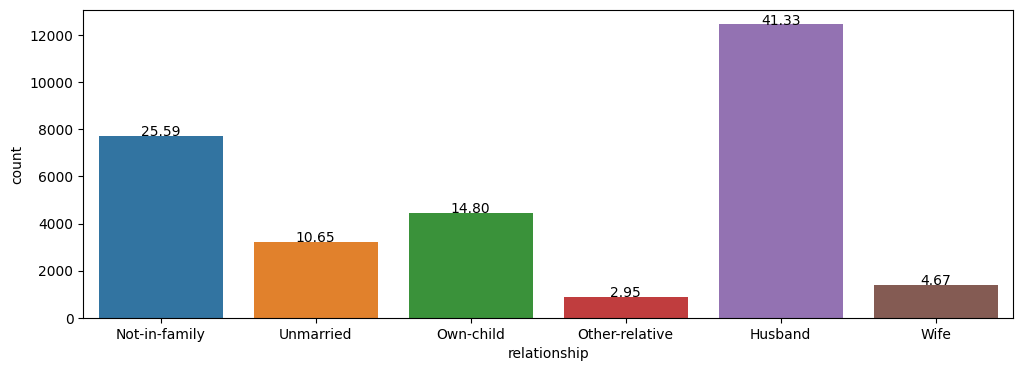

In [21]:
plt.figure(figsize=(12,4))
total = float(len(df) )
a = sns.countplot(x="relationship", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

**Income (Target) Variable Distribution**

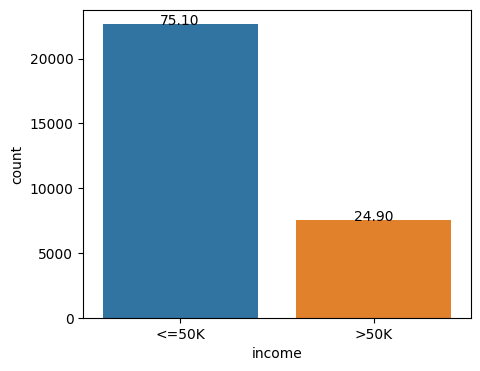

In [22]:
plt.figure(figsize=(5,4))
total = float(len(df) )
a = sns.countplot(x="income", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

In income there is 2 group,group1(who earns more than 50k) 24.90% belong to income and group2(who earns less than 50k) 75.10% belong to income

**Bivariate Analysis**

**Boxplot(Age relationship with income):**

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

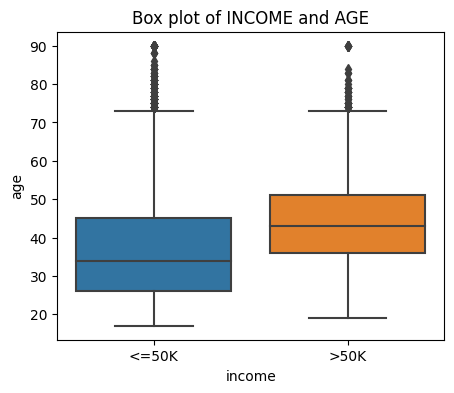

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')

we can observe that the median age for people earning more than 50k is significantly greater than the median of people earning less than 50k. So, older people are more likely to earn more than $50k a year as compared to their younger counterparts.

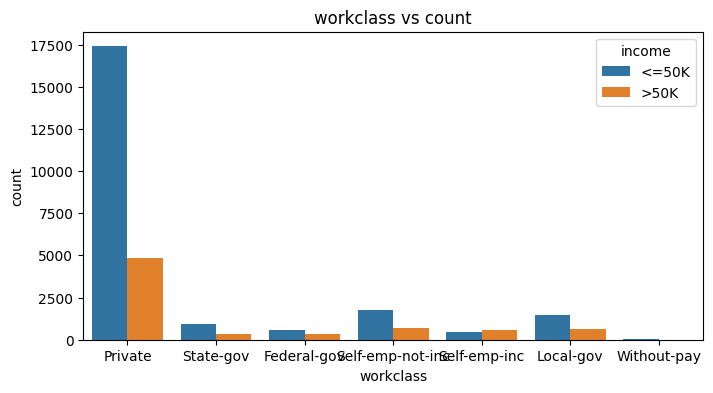

In [24]:
plt.figure(figsize=(8,4))
a=sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")

in All the workclasses number of people earning less then 50k are more then those earning 50k.

**Boxplot (relationship Relationship with income):**

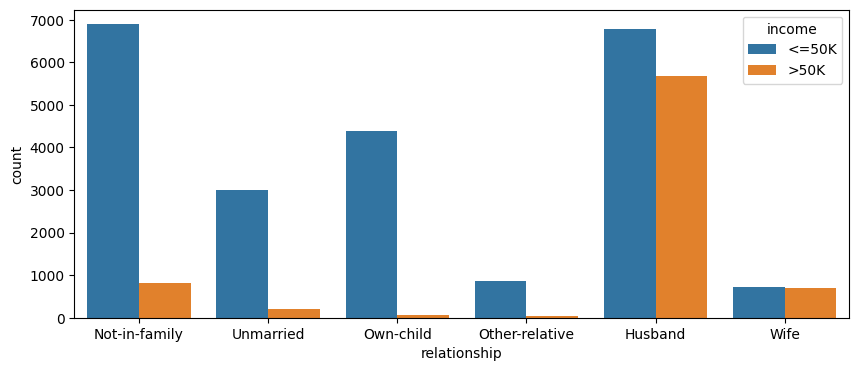

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x="relationship", hue="income",data=df);

Mostly a person with relation as husband in a family has most count of people with more then 50k income

<Axes: ylabel='count'>

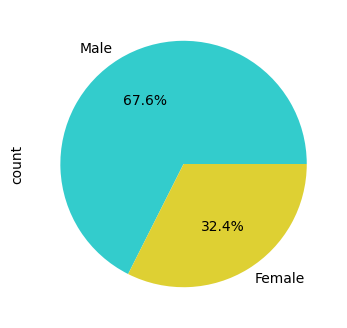

In [26]:
plt.figure(figsize=(10,4))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])


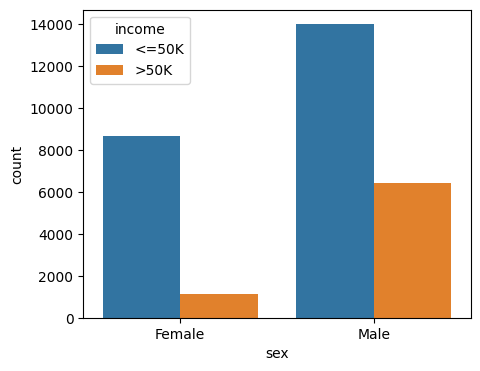

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x="sex", hue="income",data=df);

**Feautre Scaling**

In [28]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


From observation we conclude that education. num and education are similar with education is categorical and education.num as numerical

For Bachelors, the Education Number is [13]

For HS-grad, the Education Number is [9]

For 11th, the Education Number is [7]

For Masters, the Education Number is [14]

For 9th, the Education Number is [5]

For Some-college, the Education Number is [10]

For Assoc-acdm, the Education Number is [12]

For Assoc-voc, the Education Number is [11]

For 7th-8th, the Education Number is [4]

For Doctorate, the Education Number is [16]

For Prof-school, the Education Number is [15]

For 5th-6th, the Education Number is [3]

For 10th, the Education Number is [6]

For 1st-4th, the Education Number is [2]

For Preschool, the Education Number is [1]

For 12th, the Education Number is [8]

I see that Education Number and Education are just the same, so, Education of them column could be droped.we already discussed that we need to drop capital-gain and capital-loss.



In [29]:
df.drop(['education','capital.gain','capital.loss'], axis = 1, inplace = True)
df.shape

(30139, 12)

**Data pre-processing**

The data must be pre-processed before fed as input for training. Here there are various categorical variables which do not map to numerical value. These must be converted to numerical form. There are two paths that can be deployed:

**Map to ordinal values**

**One-hot encoding**

**Map to ordinal values**

This method revolves around replacing a category to a mapped numeric value. One example is mapping Male to 1 and Female to 0 for the Gender attribute. We have sorted the average purchase value for each category and assigned a value on a priority basis.

**One-hot encoding**

This involes creating a binary variable for each attribute. Here, we have one-hot encoded City_Category. Each new variable takes on the value 1 if the original variable had that category and 0 otherwise.

**Mapping v/s One-hot encoding**

The main advantage of one-hot encoding is that it preserves the categorical nature of the variable and prevents the numerical values from being interpreted as having an inherent order or magnitude. This is particularly important when dealing with variables that do not have a natural order, such as types of products or regions.

The choice between replacement with values and one-hot encoding depends on the specific problem at hand and the nature of the variable being transformed. If the categories have an inherent order or magnitude, replacement with values may be more appropriate. If the categories are unordered, one-hot encoding is usually the preferred method.

But again for simplicity we are going to do mapping here

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,2,132870,9,6,3,1,4,0,18,38,0
3,54,2,140359,4,0,6,4,4,0,40,38,0
4,41,2,264663,10,5,9,3,4,0,40,38,0
5,34,2,216864,9,0,7,4,4,0,45,38,0
6,38,2,150601,6,5,0,4,4,1,40,38,0


In [31]:
X = df.drop('income', axis = 1)
y = df['income']
# standardizing the dataframe
X = StandardScaler().fit_transform(X)
X.shape

(30139, 11)

**Data splitting**

We split the provided data set in 80:20 for training and testing. In ML, we split the data to evaluate the performance of our models accurately. The main reason for splitting data into training and testing sets is to train our model on a subset of data and test its performance on unseen data.

By using a separate testing set, we can determine whether our model is overfitting or underfitting. Overfitting occurs when the model performs well on the training data but poorly on the testing data, while underfitting occurs when the model does not capture the underlying patterns in the data and performs poorly on both training and testing data.

Splitting data allows us to optimize our model's parameters on the training data and evaluate its performance on the testing data, which is representative of the real-world data. This process helps us to build models that generalize well to new, unseen data and provide accurate predictions or classifications.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

In [33]:
modelLG = LogisticRegression()
modelLG.fit(x_train, y_train)
y_predict = modelLG.predict(x_test)
print('Accuracy=',accuracy_score(y_test, y_predict))

Accuracy= 0.7967816854678168


My accuracy is near 80% which pretty good with logistic regression
Down below some more evaluation matrix i have disccused.



In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4504
           1       0.67      0.39      0.49      1524

    accuracy                           0.80      6028
   macro avg       0.74      0.66      0.68      6028
weighted avg       0.78      0.80      0.78      6028



**Precision:**

 Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model

** Accuracy:**
  Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances.

  **Recall:**
  
   Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.

  ** F1-Score**:
  
   F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall,



**Confusion Matrix**

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

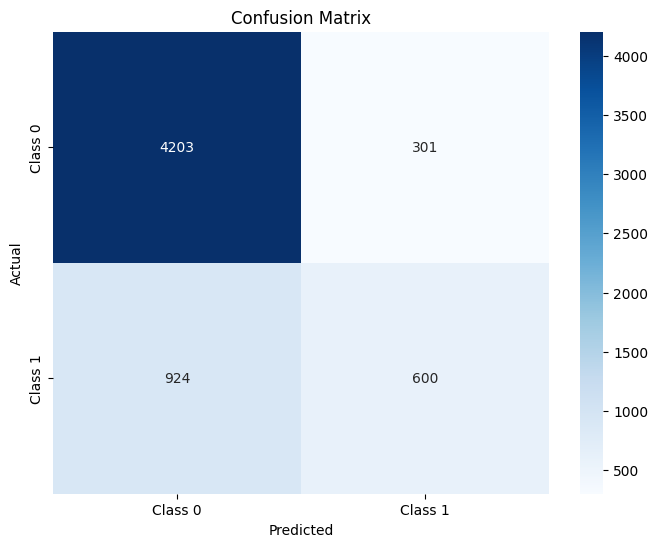

In [35]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [36]:

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)


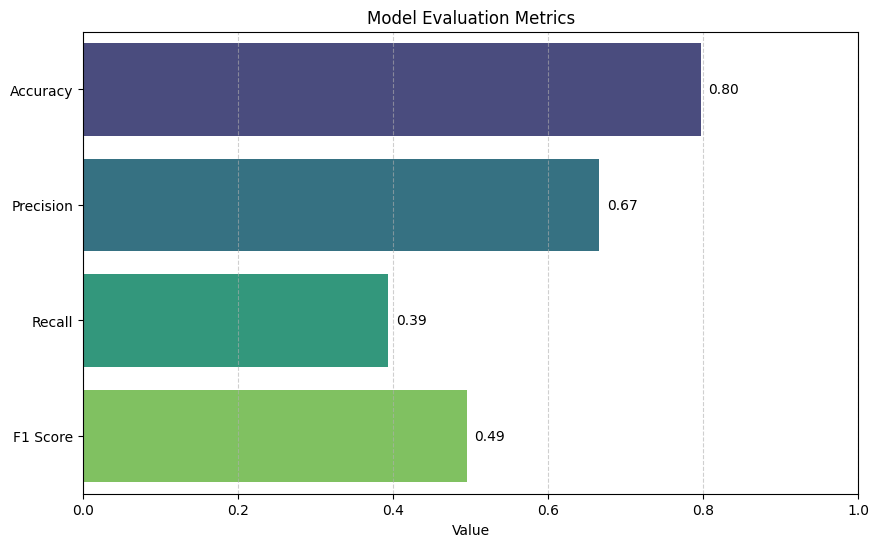

In [37]:
# Create a bar plot to visualize the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Value')
plt.xlim(0, 1)  # Adjust the x-axis limits if needed
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the values on the bars
for i, v in enumerate(values):
    plt.text(v + 0.01, i, f'{v:.2f}', color='black', va='center')

plt.show()

**Future Improvement:**
we could have used PCA feature extraction
we can use different classification model like decision tree, SVM , random forest, or gradient boosting classifier, etc. to see is there model which can perform better than this.

we can further make some improvement in feature extraction like using one hot coding for gender or for nominal data type, etc.